In [54]:
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import keras
from keras.datasets import mnist
from keras.models import Sequential,load_model
from keras.layers.core import Dropout,Dense,Activation,Lambda,Flatten
from keras.utils import np_utils
from keras.preprocessing import image
from keras.layers.normalization import  BatchNormalization

from keras.layers import Conv2D,MaxPooling2D

# VGG implementation of MNIST - Accuracy 0.9929 EP8

In [41]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [42]:
#one hot encoding
n_classes=10
Y_train = np_utils.to_categorical(y_train, n_classes)
Y_test = np_utils.to_categorical(y_test, n_classes)

In [34]:
x_train=np.expand_dims(x_train,1)
x_test=np.expand_dims(x_test,1)
xd=np.expand_dims(x_train)

In [46]:
#x_train1=np.expand_dims(x_train,1)
x_train.shape
#x_train1.shape

(60000, 28, 28, 1)

In [45]:
x_train = x_train.reshape(x_train.shape[0],  28, 28,1).astype('float32')
x_test = x_test.reshape(x_test.shape[0],  28, 28,1).astype('float32')

In [47]:
mean_x=x_train.mean().astype(np.float32)
std_x=x_train.std().astype(np.float32)
def normalize(x):
    return (x-mean_x)/std_x
def test(x):
    return x

In [48]:
#input_shape = (224, 224, 3)
vggmodel = Sequential([
    Lambda(normalize,input_shape=(28,28,1)),
    Conv2D(32, (3, 3),  activation='relu'),
    Conv2D(32, (3, 3), activation='relu'),
    MaxPooling2D(),
    Conv2D(64, (3, 3), activation='relu'),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(),
    Flatten(),
    Dense(512, activation='relu'),
    Dense(10, activation='softmax')
])
vggmodel.compile(optimizer=keras.optimizers.Adam(),loss=keras.losses.categorical_crossentropy,metrics=['accuracy'])

In [49]:
vggmodel.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lambda_12 (Lambda)           (None, 28, 28, 1)         0         
_________________________________________________________________
conv2d_68 (Conv2D)           (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_69 (Conv2D)           (None, 24, 24, 32)        9248      
_________________________________________________________________
max_pooling2d_31 (MaxPooling (None, 12, 12, 32)        0         
_________________________________________________________________
conv2d_70 (Conv2D)           (None, 10, 10, 64)        18496     
_________________________________________________________________
conv2d_71 (Conv2D)           (None, 8, 8, 64)          36928     
_________________________________________________________________
max_pooling2d_32 (MaxPooling (None, 4, 4, 64)          0         
__________

In [50]:
gen=image.ImageDataGenerator()
train_batch=gen.flow(x=x_train,y=Y_train,batch_size=64)
valid_batch=gen.flow(x=x_test,y=Y_test,batch_size=64)

In [51]:
mnist_vggmodel=vggmodel.fit_generator(train_batch,epochs=8,validation_data=valid_batch,
                                      steps_per_epoch=len(train_batch),validation_steps=len(valid_batch))

Epoch 1/8
938/938 [==============================] - 154s 164ms/step - loss: 0.1072 - acc: 0.9670 - val_loss: 0.0557 - val_acc: 0.9833
Epoch 2/8
938/938 [==============================] - 153s 163ms/step - loss: 0.0362 - acc: 0.9884 - val_loss: 0.0383 - val_acc: 0.9874
Epoch 3/8
938/938 [==============================] - 148s 157ms/step - loss: 0.0244 - acc: 0.9920 - val_loss: 0.0298 - val_acc: 0.9912
Epoch 4/8
938/938 [==============================] - 146s 156ms/step - loss: 0.0193 - acc: 0.9942 - val_loss: 0.0280 - val_acc: 0.9917
Epoch 5/8
938/938 [==============================] - 1003s 1s/step - loss: 0.0166 - acc: 0.9947 - val_loss: 0.0254 - val_acc: 0.9930
Epoch 6/8
938/938 [==============================] - 153s 163ms/step - loss: 0.0125 - acc: 0.9961 - val_loss: 0.0328 - val_acc: 0.9920
Epoch 7/8
938/938 [==============================] - 155s 165ms/step - loss: 0.0116 - acc: 0.9964 - val_loss: 0.0279 - val_acc: 0.9923
Epoch 8/8
938/938 [==============================] - 157s

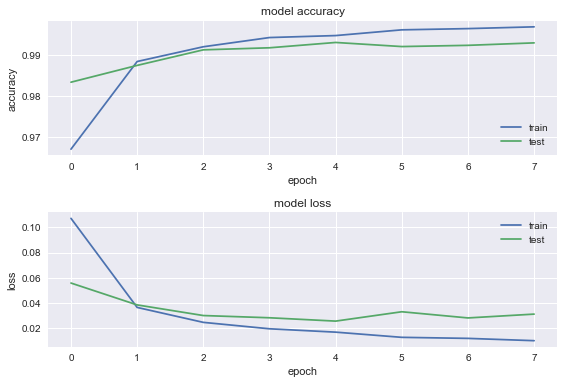

In [52]:
fig = plt.figure()
plt.subplot(2,1,1)
plt.plot(mnist_vggmodel.history['acc'])
plt.plot(mnist_vggmodel.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='lower right')

plt.subplot(2,1,2)
plt.plot(mnist_vggmodel.history['loss'])
plt.plot(mnist_vggmodel.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')

plt.tight_layout()
plt.show()

In [53]:
save_dir='/Users/sandip/Data/Kaggle/MNIST/model/'
model_name='mnist_vgg_basic_9929_EP8.h5'
import os
model_path = os.path.join(save_dir, model_name)
vggmodel.save(model_path)
print('Saved trained model at %s ' % model_path)

Saved trained model at /Users/sandip/Data/Kaggle/MNIST/model/mnist_vgg_basic_9929_EP8.h5 


In [59]:
predicted_classes = vggmodel.predict_classes(x_test)

# see which we predicted correctly and which not
correct_indices = np.nonzero(predicted_classes == y_test)[0]
incorrect_indices = np.nonzero(predicted_classes != y_test)[0]
print()
print(len(correct_indices)," classified correctly")
print(len(incorrect_indices)," classified incorrectly")

10000/10000 [==============================] - 8s 809us/step

9929  classified correctly
71  classified incorrectly


2

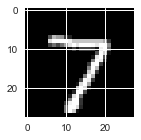

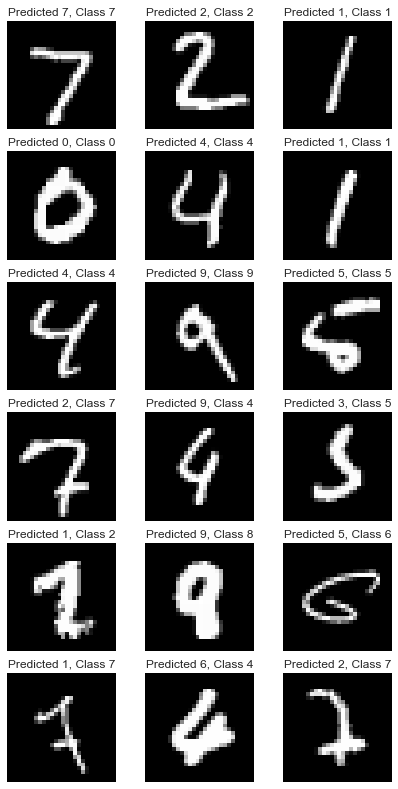

In [61]:
plt.rcParams['figure.figsize'] = (7,14)

figure_evaluation = plt.figure()

# plot 9 correct predictions
for i, correct in enumerate(correct_indices[:9]):
    plt.subplot(6,3,i+1)
    plt.imshow(x_test[correct].reshape(28,28), cmap='gray', interpolation='none')
    plt.title("Predicted {}, Class {}".format(predicted_classes[correct], y_test[correct]))
    plt.xticks([])
    plt.yticks([])

# plot 9 incorrect predictions
for i, incorrect in enumerate(incorrect_indices[:9]):
    plt.subplot(6,3,i+10)
    plt.imshow(x_test[incorrect].reshape(28,28), cmap='gray', interpolation='none')
    plt.title("Predicted {}, Class {}".format(predicted_classes[incorrect], y_test[incorrect]))
    plt.xticks([])
    plt.yticks([])
plt.show()

# MNIST VGG Batch normalization, dropout

In [56]:
#input_shape = (224, 224, 3)
vggmodel_BN_DO = Sequential([
    Lambda(normalize,input_shape=(28,28,1)),
    Conv2D(32, (3, 3),  activation='relu'),
    BatchNormalization(axis=1),
    Conv2D(32, (3, 3), activation='relu'),
    MaxPooling2D(),
    BatchNormalization(axis=1),
    Conv2D(64, (3, 3), activation='relu'),
    BatchNormalization(axis=1),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(),
    Flatten(),
    BatchNormalization(),
    Dense(512, activation='relu'),
    BatchNormalization(),
    Dropout(0.5),
    Dense(10, activation='softmax')
])
vggmodel_BN_DO.compile(optimizer=keras.optimizers.Adam(),loss=keras.losses.categorical_crossentropy,metrics=['accuracy'])

In [57]:
mnist_vggmodel_BN_DO=vggmodel_BN_DO.fit_generator(train_batch,epochs=4,validation_data=valid_batch,
                                      steps_per_epoch=len(train_batch),validation_steps=len(valid_batch))

Epoch 1/4
938/938 [==============================] - 534s 569ms/step - loss: 0.1132 - acc: 0.9664 - val_loss: 0.0374 - val_acc: 0.9884
Epoch 2/4
938/938 [==============================] - 530s 565ms/step - loss: 0.0465 - acc: 0.9859 - val_loss: 0.0457 - val_acc: 0.9847
Epoch 3/4
 37/938 [>.............................] - ETA: 7:52 - loss: 0.0567 - acc: 0.9827

KeyboardInterrupt: 